In [ ]:
import pandas as pd
import numpy as np
from random import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
files.upload()

In [ ]:
#Read the Data
salaries = pd.read_csv("./clean_kaggle_data_2022.csv", low_memory = False, encoding = 'latin2')
salaries.shape

(8137, 298)

In [ ]:
salaries.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"


## Data Cleaning

In [ ]:
#Dropping irrelevant data
def CleanData(df):
    # Drop the first row (question details)
    df.drop(df.index[0], inplace=True)

    #Dropping the first column because the time it takes to complete the survey has no relevance with the individual's salary
    df.drop('Duration (in seconds)', axis = 1, inplace = True)
    #TODO: Drop other information too here if they are irrelevant to the task

    #Dropping the Q5 column because every response in that column is no, and hence does not contribute - feature is meaningless.
    df.drop('Q5', axis = 1, inplace = True)

    #Dropping the original Q_29 column because our target variable is based on that and bins have been formed again, by keeping this feature, we will impact our results
    df.drop('Q29', axis = 1, inplace = True)

    #Dropping the buckets in the final column as the encoded q_29 already represents this bin, at the end for qualitative purpose they can be used based on predicted scores if required
    df.drop('Q29_buckets', axis = 1, inplace = True)

    return df

#Clean data using the function defined
salaries = CleanData(salaries)

**Single Columns Cleaning**



In [ ]:
#Defining a function just to define and find a list of columns that have more than 1 unique item
def iden_single_col(df):

  single_columns = []

  for column in df.columns:
    if df[column].nunique() != 1:
      single_columns.append(column)

  return single_columns

  #identifying single column values using the function and calculating their missing percentages
single_columns = iden_single_col(salaries)
print((salaries[single_columns].isnull().sum()/len(salaries))*100)

Q2              0.000000
Q3              0.000000
Q4              0.000000
Q8              0.000000
Q9             36.147984
Q11             0.000000
Q16             8.407080
Q22            80.162242
Q23             0.000000
Q24             0.000000
Q25             0.000000
Q26             0.000000
Q27             0.000000
Q30             0.614553
Q32            77.126352
Q43            45.759587
Q29_Encoded     0.000000
dtype: float64


In [ ]:
#Defining a function to identify the multicolumn values
def iden_multi_column(df):
  multi_columns = []

  for column in df.columns:
    if df[column].nunique() == 1:
      multi_columns.append(column)

  return multi_columns

#Identifying and printing multicolumn values
multi_columns = iden_multi_column(salaries)
print((salaries[multi_columns].isnull().sum()/len(salaries))*100)
multi_columns.append('Q29_Encoded')

Q6_1      53.761062
Q6_2      86.258604
Q6_3      70.747296
Q6_4      82.091937
Q6_5      94.186332
            ...    
Q44_8     55.469518
Q44_9     77.384464
Q44_10    90.585054
Q44_11    95.022124
Q44_12    96.116028
Length: 277, dtype: float64


In [ ]:
#Filling in missing values for single column values

#We impute the missing values with the mode
salaries['Q9'].fillna(salaries['Q9'].mode()[0], inplace=True)

#Dropped due to high percentage of missing values
salaries.drop(columns=['Q22'], inplace=True)

#he same argument applies here as Q22, best to drop feature
salaries.drop(columns=['Q32'], inplace=True)

#We impute the missing values with the mode,
salaries['Q43'].fillna(salaries['Q43'].mode()[0], inplace=True)

#We impute the missing values with the mode,
salaries['Q16'].fillna(salaries['Q16'].mode()[0], inplace=True)

#Rows dropped as very few missing
salaries.dropna(subset=['Q30'], inplace=True)

#Removing the columns from single_col just for reference
elements_to_remove = ['Q22', 'Q32']
single_columns = [col for col in single_columns if col not in elements_to_remove]

#Checking percentage of missing values
print("Percentage of null values (make sure they are all zeros): ")
print(salaries[single_columns].isnull().sum()*100/len(salaries))
assert salaries[single_columns].isnull().values.sum() == 0, \
      "There are still missing values remaining!"





Percentage of null values (make sure they are all zeros): 
Q2             0.0
Q3             0.0
Q4             0.0
Q8             0.0
Q9             0.0
Q11            0.0
Q16            0.0
Q23            0.0
Q24            0.0
Q25            0.0
Q26            0.0
Q27            0.0
Q30            0.0
Q43            0.0
Q29_Encoded    0.0
dtype: float64


**Encode categorical features (single column responses)**

In [ ]:
#Mapping all columns with ordinal relationship

#Q2
mappings = {'18-21': 1, '22-24': 2, '25-29': 3, '30-34': 4, '35-39': 5, '40-44': 6,
            '45-49': 7, '50-54': 8, '55-59': 9, '60-69': 10, '70+': 11}
salaries['Q2'] = salaries['Q2'].replace(mappings)

#Q8 Education Level Mapping - Prefer not to answer dropped
salaries = salaries[salaries['Q8'] != 'I prefer not to answer']
salaries['Q8'] = salaries['Q8'].replace("BachelorEEs degree", "Bachelor's degree")
salaries['Q8'] = salaries['Q8'].replace("MasterEEs degree", "Master's Degree")
salaries['Q8'] = salaries['Q8'].replace("Some college/university study without earning a bachelorEEs degree",
                                        "Some college/university study without earning a bachelor's degree")
ordinal_mapping = {
    "No formal education past high school": 1,
    "Some college/university study without earning a bachelor's degree": 2,
    "Bachelor's degree": 3,
    "Master's Degree": 4,
    "Doctoral degree": 5,
    "Professional doctorate": 6
}
salaries['Q8'] = salaries['Q8'].map(ordinal_mapping)

#Q11 -  I have never written code assigned 0 for accurate ordinal relationship
ordinal_mapping = {
    "I have never written code": 0,
    "< 1 years": 1,
    "1-3 years": 2,
    "3-5 years": 3,
    "5-10 years": 4,
    "10-20 years": 5,
    "20+ years": 6
}
salaries['Q11'] = salaries['Q11'].map(ordinal_mapping)

#Q16
ordinal_mapping = {
    "I do not use machine learning methods": 0,
    "Under 1 year": 1,
    "1-2 years": 2,
    "2-3 years": 3,
    "3-4 years": 4,
    "4-5 years": 5,
    "5-10 years": 6,
    "10-20 years": 7,
    "20+ years": 8
}
salaries['Q16'] = salaries['Q16'].map(ordinal_mapping)

#Q25
ordinal_mapping = {
    '0-49 employees': 1,
    '50-249 employees': 2,
    '250-999 employees': 3,
    '1000-9,999 employees': 4,
    '10,000 or more employees': 5
}
salaries['Q25'] = salaries['Q25'].map(ordinal_mapping)

#Q26
salaries['Q26'] = salaries['Q26'].replace("2-Jan", "1-2")
salaries['Q26'] = salaries['Q26'].replace("4-Mar", "3-4")
salaries['Q26'] = salaries['Q26'].replace("9-May", "5-9")
salaries['Q26'] = salaries['Q26'].replace("14-Oct", "10-14")

ordinal_mapping = {
    '0': 0,
    '1-2': 1,
    '3-4': 2,
    '5-9': 3,
    '10-14': 4,
    '15-19': 5,
    '20+': 6
}
salaries['Q26'] = salaries['Q26'].map(ordinal_mapping)

#Q30
salaries['Q30'].value_counts()
ordinal_mapping = {
    '$0 ($USD)': 0,
    '$1-$99': 1,
    '$100-$999': 2,
    '$1000-$9,999': 3,
    '$10,000-$99,999': 4,
    '$100,000 or more ($USD)': 5
}
salaries['Q30'] = salaries['Q30'].map(ordinal_mapping)

#Q43
salaries['Q43'].value_counts()
ordinal_mapping = {
    'Never': 0,
    'Once': 1,
    '2-5 times': 2,
    '6-25 times': 3,
    'More than 25 times': 4
}

salaries['Q43'] = salaries['Q43'].map(ordinal_mapping)



In [ ]:
#All columns here are nominal in nature so one0hot encoding is applied to create 1-0 dummies

#Q3Converting Non-Binary, prefer not to say and prefer to self describe in one category, due to small amount of data, to avoid too many features
salaries_encoded = pd.get_dummies(salaries['Q3'], prefix='Q3')
salaries_encoded['Q3_Other'] = salaries_encoded[['Q3_Nonbinary', 'Q3_Prefer not to say', 'Q3_Prefer to self-describe']].max(axis=1)
salaries_encoded.drop(columns=['Q3_Nonbinary', 'Q3_Prefer not to say', 'Q3_Prefer to self-describe'], inplace=True)
q3_index = salaries.columns.get_loc('Q3')
salaries.drop(columns=['Q3'], inplace=True)
for col in reversed(salaries_encoded.columns):
    salaries.insert(q3_index, col, salaries_encoded[col])

#Q4
salaries_encoded = pd.get_dummies(salaries['Q4'], prefix='Q4')
q3_index = salaries.columns.get_loc('Q4')
salaries.drop(columns=['Q4'], inplace=True)
for col in reversed(salaries_encoded.columns):
    salaries.insert(q3_index, col, salaries_encoded[col])

#Q23
salaries_encoded = pd.get_dummies(salaries['Q23'], prefix='Q23')
q3_index = salaries.columns.get_loc('Q23')
salaries.drop(columns=['Q23'], inplace=True)
for col in reversed(salaries_encoded.columns):
    salaries.insert(q3_index, col, salaries_encoded[col])

#Q24
salaries_encoded = pd.get_dummies(salaries['Q24'], prefix='Q24')
q3_index = salaries.columns.get_loc('Q24')
salaries.drop(columns=['Q24'], inplace=True)
for col in reversed(salaries_encoded.columns):
    salaries.insert(q3_index, col, salaries_encoded[col])

#Q27
salaries_encoded = pd.get_dummies(salaries['Q27'], prefix='Q27')
q3_index = salaries.columns.get_loc('Q27')
salaries.drop(columns=['Q27'], inplace=True)
for col in reversed(salaries_encoded.columns):
    salaries.insert(q3_index, col, salaries_encoded[col])

In [ ]:
#Q9 - It is a simple binary variable with 2 options yes or no - therefore we can perform binary encoding - 1 to yes and 0 to no
mapping = {'Yes': 1, 'No': 0}
salaries['Q9'] = salaries['Q9'].map(mapping)

In [ ]:
salaries.shape

(7664, 383)

###**Handling categorical features (multi column responses)**

In [ ]:
#Finding the questions that were multicolumn
unique_prefixes = list(set([col.split('_')[0] for col in multi_columns]))
unique_prefixes.remove('Q29')
print(unique_prefixes)
prefix_dataframes = {}

#Creating a new dictionary, extracting columns associated with each question and storing in individual dataframes
for prefix in unique_prefixes:
    prefix_columns = [col for col in salaries.columns if col.startswith(prefix)]

    if prefix_columns:
        prefix_dataframes[prefix] = salaries[prefix_columns].copy()



['Q44', 'Q35', 'Q39', 'Q37', 'Q12', 'Q33', 'Q18', 'Q38', 'Q28', 'Q7', 'Q15', 'Q19', 'Q17', 'Q20', 'Q21', 'Q10', 'Q36', 'Q14', 'Q42', 'Q6', 'Q40', 'Q13', 'Q31', 'Q41', 'Q34']


In [ ]:
#Calcualte percentage of missing values for each question by iterating over each dataframe
#if no quesiton selected - all nan - then missing

missing_values_count = {}

for prefix, df in prefix_dataframes.items():
    num_columns = len(df.columns)
    count_missing_values = 0

    for index, row in df.iterrows():
        missing_values_in_row = row.isna().sum()

        if missing_values_in_row == num_columns:
            count_missing_values += 1

    missing_values_count[prefix] = count_missing_values
    divisor = len(salaries)

missing_values = pd.DataFrame(missing_values_count, index = [0])
missing_percentages_dic = {}

for key, value in missing_values_count.items():
  missing_percentages_dic[key] = value / divisor

missing_percentages = pd.DataFrame(missing_percentages_dic, index = [0])
missing_percentages.transpose()


,0
Q44,0.029228
Q35,0.379958
Q39,0.444024
Q37,0.440371
Q12,0.080245
Q33,0.548278
Q18,0.213335
Q38,0.442589
Q28,0.000000
Q7,0.000000


In [ ]:
#Dropping the multicolumn features with more than 50% of the data missing

features_to_drop  = ['Q19', 'Q33', 'Q10','Q34', 'Q20']
for prefix in features_to_drop:
    columns_to_drop = [col for col in salaries.columns if col.startswith(prefix)]
    salaries.drop(columns=columns_to_drop, inplace=True)

keys_to_drop = [key for key in prefix_dataframes.keys() if any(key.startswith(prefix) for prefix in features_to_drop)]

for key in keys_to_drop:
    del prefix_dataframes[key]


In [ ]:
salaries.shape

(7664, 353)

In [ ]:
#We check if any of the options for that question are selected, if they
#are then the remaining values for those columns in that row are filled with 'Not Selected'

for prefix, df in prefix_dataframes.items():
    num_columns = len(df.columns)

    for index, row in df.iterrows():
        missing_values_in_row = row.isna().sum()

        if missing_values_in_row != num_columns:
           df.loc[index] = row.fillna('Not Selected')

In [ ]:
#check if all values missing for a question in a row. if they are then we create a new column

for key, df in prefix_dataframes.items():
    nan_rows = df.isnull().all(axis=1)

    if nan_rows.any():
        new_column_name = f'{key}_prefer_not_to_answer'
        df[new_column_name] = 0

        for index, row in df.iterrows():
            if nan_rows[index]:

                #if no option selected for that question, 1 inputted in the prefer not to answer new column
                df.at[index, new_column_name] = 1

                #All the nan values in the original column are replaced with not selected
                df.loc[index] = df.loc[index].fillna('Not Selected')

    # All values with not selected encoded as 0, the one with options selected encoded as 1
    for column in df.columns:
        if column != new_column_name:
            df[column] = df[column].apply(lambda x: 1 if x != 'Not Selected' else 0)

In [ ]:
#Replacing our columns in salaries dataframe with encoded dataframes
for key, df in prefix_dataframes.items():
    for column in df.columns:
        if column in salaries.columns:
            salaries[column] = df[column]
        else:
            salaries[column] = df[column]

#We add the columns we added to the salaries dataframe, - the questions that were not answered at all (missing)
for key, df in prefix_dataframes.items():
    new_column_name = f'{key}_prefer_not_to_answer'
    if new_column_name in df.columns:
        salaries[new_column_name] = df[new_column_name]

In [ ]:
#Demonstration of encoded dataframe
salaries.head()

,Q2,Q3_Man,Q3_Woman,Q3_Other,Q4_Algeria,Q4_Argentina,Q4_Australia,Q4_Bangladesh,Q4_Belgium,Q4_Brazil,...,Q15_prefer_not_to_answer,Q17_prefer_not_to_answer,Q21_prefer_not_to_answer,Q36_prefer_not_to_answer,Q14_prefer_not_to_answer,Q42_prefer_not_to_answer,Q40_prefer_not_to_answer,Q13_prefer_not_to_answer,Q31_prefer_not_to_answer,Q41_prefer_not_to_answer
1,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,1
3,11,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Checking if our salaries dataframe has any non-numeric values

numeric_df = df.apply(pd.to_numeric, errors='coerce')
has_non_numeric_values = numeric_df.isna().any().any()

if has_non_numeric_values:
    print("DataFrame contains non-numeric values.")
else:
    print("DataFrame does not contain non-numeric values.")

DataFrame does not contain non-numeric values.


###**Drop the target variable(s) and get the target variable**

In [ ]:
# Make sure there are no missing values remaining in the dataset
assert salaries.isnull().values.sum() == 0, \
    "There are still {} missing values remaining in salaries!".format(
        salaries.isnull().values.sum()
    )

In [ ]:
#Seperating Q29_encoded and then dropping it from salaries dataframe
target = salaries['Q29_Encoded']
salaries.drop('Q29_Encoded', axis = 1, inplace = True)

# Making sure the target variables are not included in the feature set
for col in salaries.columns:
    assert 'Q29' not in col, \
        "Target variable ({}) is still in the dataset".format(col)

# Exploratory Feature Analysis


## Split data into training and test sets

In [ ]:
#Splitting Data into train and test sets.
salaries_train, salaries_test, y_train, y_test = train_test_split(salaries, target, test_size = 0.2, random_state = 0)


## **Feature Selection**


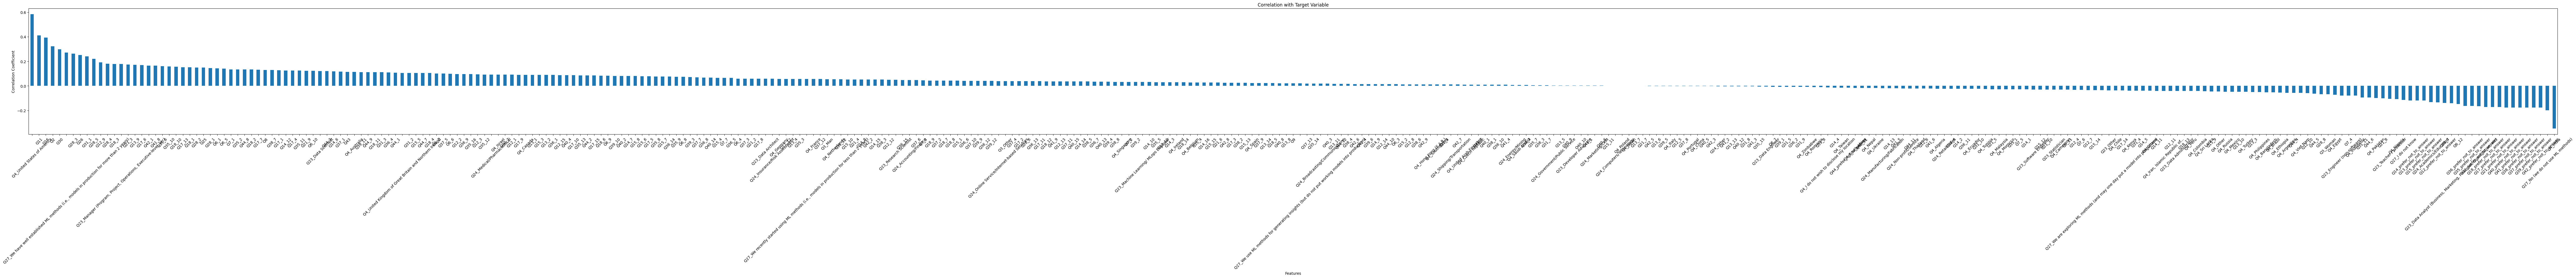

In [ ]:
#Calculating initial correlation
train_data = pd.concat([salaries_train, y_train], axis=1)
correlation_matrix = train_data.corr()
correlation_with_target = correlation_matrix.iloc[-1, :-1]
correlation_with_target_sorted = correlation_with_target.sort_values(ascending=False)

# Plotting the Data
plt.figure(figsize=(120, 6))
correlation_with_target_sorted.plot(kind='bar')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.linear_model import Lasso, Ridge

#Using L1 linear regularization for feature selection
lasso_model = Lasso(alpha=0.05)
lasso_model.fit(salaries_train, y_train)

#Extracting feature importance as coefficients
coefficients = lasso_model.coef_
non_zero_indices = np.where(coefficients != 0)[0]
selected_features = salaries_train.columns[non_zero_indices]
nonzero_coefficients = coefficients[non_zero_indices]

#Preparing for plotting
absolute_coefficients = np.abs(nonzero_coefficients)
sorted_indices = np.argsort(absolute_coefficients)[::-1]
sorted_features = selected_features[sorted_indices]
sorted_coefficients = absolute_coefficients[sorted_indices]


 **Visualization**



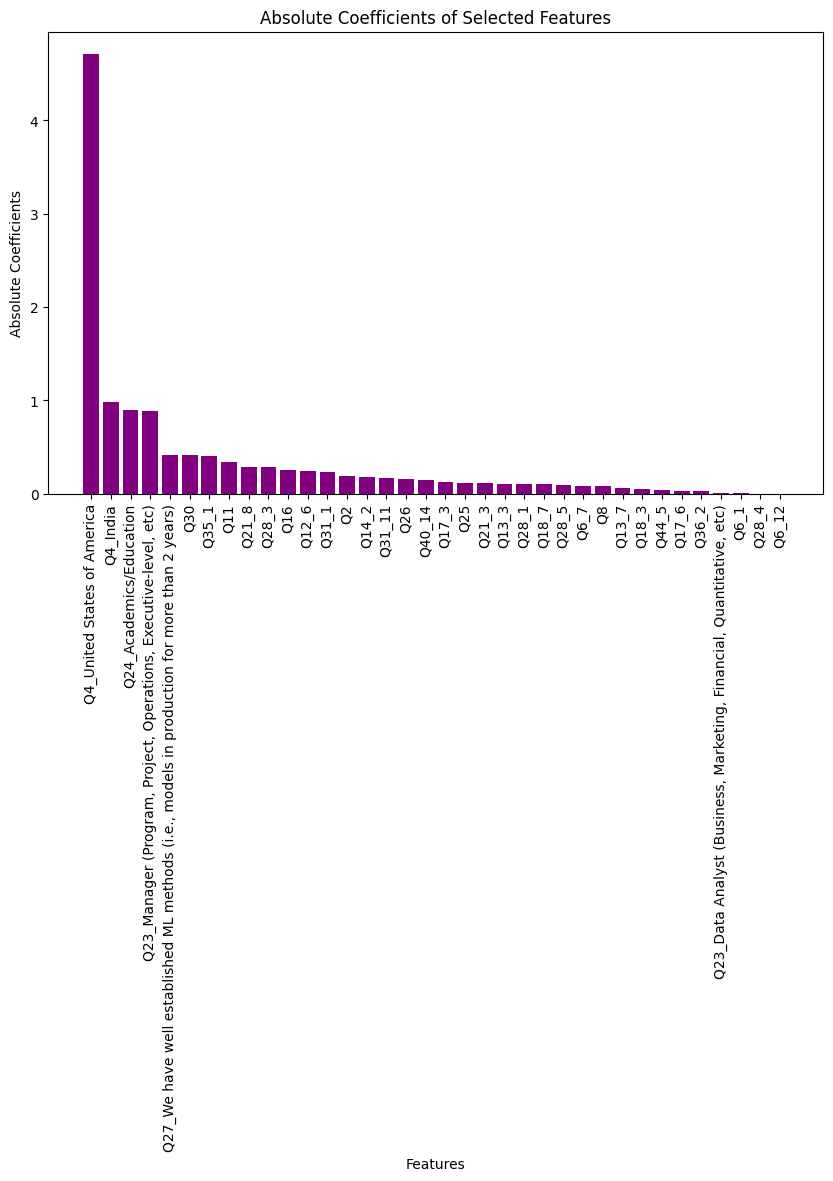

In [ ]:
#Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_coefficients, color = 'purple')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficients')
plt.title('Absolute Coefficients of Selected Features')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Seperating dataframe with selected features
salaries_train_selected = salaries_train[selected_features]


## **Apply the same feature engineering/selection to test data**

In [ ]:
#TODO: Feature generation code you applied to the training data (optional)
salaries_test_selected = salaries_test[selected_features]


In [ ]:
#Initializing numpy arrays of test and train data
X_train = salaries_train_selected.values
X_test = salaries_test_selected.values
y_train = y_train.values
y_test = y_test.values

#Model Implementation

In [ ]:
#implemnting our Ordinal Logistic Regression Model using provided skeleton
class OrdinalLogisticRegression():
    def __init__(self, max_iter=500, C = 0.1, penalty = 'l2', solver = 'saga'):
        self.C = C
        self.max_iter = max_iter
        self.classes = []
        self.models = []
        self.penalty = penalty
        self.solver = solver
        self.feature_names = salaries_train_selected.columns.tolist()

    def fit(self, X, y):
        self.classes = sorted(np.unique(y))
        self.models = []

        # Train k-1 binary logistic regression models
        for i, c in enumerate(self.classes[:-1]):
            y_i = [] # We need only k-1 classifiers
            for j in y:
              if j in self.classes[:i+1]:
                y_i.append(0)
              else:
                y_i.append(1)

            model = LogisticRegression(max_iter = self.max_iter, C = self.C, penalty = self.penalty, solver = self.solver)
            model.fit(X, y_i)
            self.models.append(model)

        return self


    def predict_proba(self, X):
        assert len(self.models) > 0, "Model is not fitted yet. Run .fit() first."

        # Predicted probabilities for k-1 binary logistic regression models (initialize placeholders)
        binary_probabilities = np.empty((X.shape[0], len(self.models), 2), dtype=float)
        # Make predictions of k-1 binary logistic regression models
        for i, model in enumerate(self.models):
             binary_probabilities[:, i, :] = model.predict_proba(X)

        # Compute the probabilities to be in each class
        k = len(self.classes)
        proba = np.empty((X.shape[0], k), dtype=float)
        proba[:, 0] = binary_probabilities[:, 0, 0] # 0th probability
        for i in range(1, k-1):
            proba[:, i] = binary_probabilities[:, i, 0] - binary_probabilities[:, i-1, 0]
        proba[:, -1] = binary_probabilities[:, k-2, 1] # (k-1)th probability
        assert (proba.sum(axis=1) == 1).all(), \
            'There is a problem in the probability computation'
        return proba

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis = 1)

    def feature_importance(self):
      if not self.models:
        raise ValueError("The model has not been fitted yet!")
      if not self.feature_names or len(self.feature_names) != self.models[0].coef_.shape[1]:
        raise ValueError("Feature names are missing or do not match the number of model coefficients!")

      coef_sum = np.zeros(self.models[0].coef_.shape[1])
      for model in self.models:
        coef_sum += np.abs(np.squeeze(model.coef_))
      importance = coef_sum / len(self.models)
      feature_importance = {name: imp for name, imp in zip(self.feature_names, importance)}
      feature_importance_sorted = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))
      return feature_importance_sorted

    def get_params(self, deep=True):
        return {'max_iter': self.max_iter, 'C': self.C, 'penalty' : self.penalty, 'solver' : self.solver}

    # DO NOT CHANGE
    def set_params(self, **parameters):
        # Set estimator parameters
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [ ]:
#Defining the class into a variable
ordlog = OrdinalLogisticRegression()
ordlog.get_params()


{'max_iter': 500, 'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}

# **Implement Ordinal Logistic Regression Model**

## Run k-fold cross validation

- Report the average/variance of accuracies across folds

In [ ]:
#Defining a function to get accuracy. Accuracy is the number of true predictions/Total values that were predited.
def accuracy_cv(prob, y_val):
  c = 0
  for i, y_true in enumerate(y_val):
    true_class = np.argmax(prob[i])
    if true_class == y_true:
      c = c + 1
    accuracy = c/len(y_val)
  return accuracy

In [ ]:
#Defining the k-fold cross validation model
from sklearn.model_selection import KFold
accuracies = []

def k_fold_cross_validation(X, y, k, model):
    kf = KFold(n_splits=k, shuffle=True, random_state=0)
    accuracies = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        #Calling our fit and predict from our ordinallogistic regression class
        models = model.fit(X_train, y_train)
        proba = model.predict_proba(X_val)

        #Calling our accuracy function
        accuracy = accuracy_cv(proba, y_val)
        accuracies.append(accuracy)

    return accuracies



In [ ]:
#Perform Printing the average accurary and varianceof our cross validation model
accuracies = k_fold_cross_validation(X_train, y_train, 10, ordlog)
print("Average accuracy    : ", np.mean(accuracies))
print("Variance of accuracy: ", np.var(accuracies))

#printing accuracies over individual folds
print(accuracies)

Average accuracy    :  0.4025482090004305
Variance of accuracy:  0.0003816715107945448
[0.3794788273615635, 0.433931484502447, 0.39804241435562804, 0.4110929853181077, 0.4078303425774878, 0.40456769983686786, 0.37520391517128876, 0.41435562805872755, 0.4257748776508972, 0.37520391517128876]


## Bias-variance trade-off

[bias_variance_decomp.py](https://github.com/rasbt/mlxtend/blob/master/mlxtend/evaluate/bias_variance_decomp.py)

Below is a function you can use to compute the bias and variance of your ordinal logistic regression model. Using this function, analyze the ordinal logistic regression model performance based on bias-variance trade-off.

In [ ]:
#Further splitting data for bias variance tradeoff
X_train_boot, X_test_boot, y_train_boot, y_test_boot = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
def _draw_bootstrap_sample(rng, X, y):
    sample_indices = np.arange(X.shape[0])
    bootstrap_indices = rng.choice(
        sample_indices, size=sample_indices.shape[0], replace=True
    )
    return X[bootstrap_indices], y[bootstrap_indices]

def bias_variance_decomp(
    estimator,
    X_train,
    y_train,
    X_test,
    y_test,
    num_rounds=10,
    random_seed=0
):
    """
    estimator : object
        A classifier or regressor object or class implementing both a
        `fit` and `predict` method similar to the scikit-learn API.

    X_train : array-like, shape=(num_examples, num_features)
        A training dataset for drawing the bootstrap samples to carry
        out the bias-variance decomposition.

    y_train : array-like, shape=(num_examples)
        Targets (class labels, continuous values in case of regression)
        associated with the `X_train` examples.

    X_test : array-like, shape=(num_examples, num_features)
        The test dataset for computing the average loss, bias,
        and variance.

    y_test : array-like, shape=(num_examples)
        Targets (class labels, continuous values in case of regression)
        associated with the `X_test` examples.

    num_rounds : int (default=10)
        Number of bootstrap rounds (sampling from the training set)
        for performing the bias-variance decomposition. Each bootstrap
        sample has the same size as the original training set.

    random_seed : int (default=0)
        Random seed for the bootstrap sampling used for the
        bias-variance decomposition.

    Returns
    ----------
    avg_bias, avg_var : returns the average bias, and average bias (all floats),
                        where the average is computed over the data points
                        in the test set.

    """
    loss = "mse"

    for ary in (X_train, y_train, X_test, y_test):
        assert type(ary) == np.ndarray, \
            "X_train, y_train, X_test, y_test have to be NumPy array. \
            If e.g., X_train is a pandas DataFrame, convert it to NumPy array \
            via X_train=X_train.values."

    rng = np.random.RandomState(random_seed)

    # All the predictions across different rounds
    all_pred = np.zeros((num_rounds, y_test.shape[0]), dtype=np.float64)

    for i in range(num_rounds):
        # Randomly sample training data
        X_boot, y_boot = _draw_bootstrap_sample(rng, X_train, y_train)

        # Fit the model using the randomly sampled data
        pred = estimator.fit(X_boot, y_boot).predict(X_test)
        all_pred[i] = pred
        #print(pred)

    # Mean prediction across runs using different dataset for each data point
    main_predictions = np.mean(all_pred, axis=0)

    # Average bias across different rounds
    avg_bias = np.sum((main_predictions - y_test) ** 2) / y_test.size

    # Average variance across different rounds
    avg_var = np.sum((main_predictions - all_pred) ** 2) / all_pred.size

    return avg_bias, avg_var

In [ ]:
avg_bias_i = []
avg_var_i = []
test_MSE = []
value_i = []

def bias_variance_calculator(x):
  value = 0.2
  for i in range(x):
    model = OrdinalLogisticRegression(max_iter = 500, C = value)
    avg_bias, avg_var = bias_variance_decomp(model, X_train_boot, y_train_boot, X_test_boot, y_test_boot, num_rounds=10, random_seed=0)
    avg_bias_i.append(avg_bias)
    avg_var_i.append(avg_var)
    MSE = (avg_bias**2) + avg_var
    test_MSE.append(MSE)
    value_i.append(value)
    value = value + 0.2
  return avg_bias_i, avg_var_i, test_MSE
#TODO: Discuss bias-variance trade-off of your ordinal logistic regression model

In [ ]:
#Have commented out the actual bias_variance_calculation as the whole calculation takes roughly approximately 20 minutes to run

#avg_bias_i, avg_var_i, test_MSE = bias_variance_calculator(20)

In [ ]:
#Harcoding the results here, so the calculation does not have to be done again and that the execution does not take very long. Results are reproducible
avg_bias_i = [12.412127139364303, 12.402860635696822, 12.367962510187448, 12.360831295843521, 12.366927465362673, 12.353920130399349, 12.344229828850855, 12.330342298288508, 12.317742461287693, 12.317139364303179, 12.322037489812551, 12.306104319478402, 12.304857375713123, 12.308443357783212, 12.295305623471883, 12.287995110024449, 12.288321108394458, 12.285052974735125, 12.27964140179299, 12.281792991035045]
avg_var_i = [1.2907253463732682, 1.2573675631621841, 1.2699348003259983, 1.2792665036674817, 1.2663243683781582, 1.2905786471067644, 1.2917114914425427, 1.285876120619397, 1.2893480032599838, 1.2827791361043195, 1.2838304808475958, 1.2954441727791361, 1.2951426242868787, 1.2948166259168703, 1.2960554197229013, 1.2964384678076608, 1.2962754686226567, 1.2975061124694376, 1.2993317033414833, 1.2976691116544419]
test_MSE   = [155.35162547011717, 155.08831951167994, 154.2364314537282, 154.0694168279721, 154.2072193019198, 153.90992123539303, 153.67172155893377, 153.32321731358215, 153.0161273458698, 152.99470125577125, 153.1164383811936, 152.73564769466412, 152.70465766092852, 152.79259451767453, 152.4705957943022, 152.29126229179244, 152.29911113163547, 152.2200327045178, 152.08892465997, 152.140108186292]
value_i = [0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998, 2.1999999999999997, 2.4, 2.6, 2.8000000000000003, 3.0000000000000004, 3.2000000000000006, 3.400000000000001, 3.600000000000001, 3.800000000000001, 4.000000000000001]

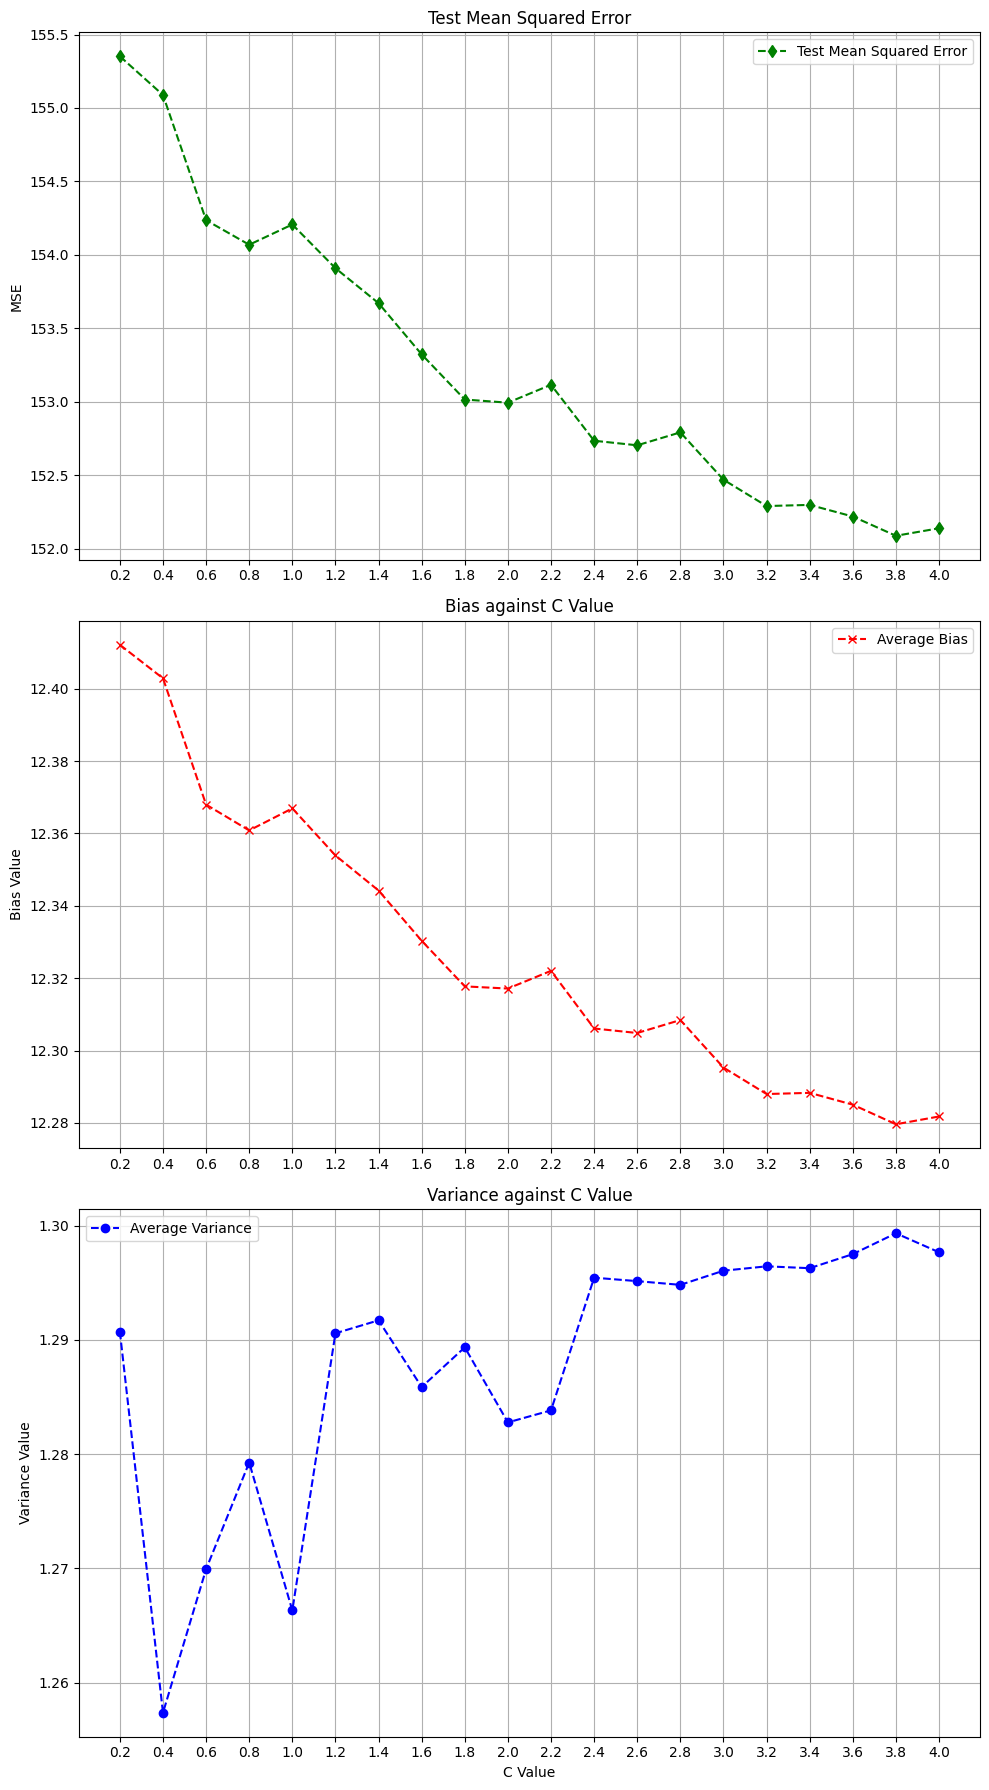

In [ ]:
plt.figure(figsize=(10, 18))

# First plot: Test MSE
plt.subplot(3, 1, 1)
plt.plot(value_i, test_MSE, marker='d', linestyle='--', color='g', label='Test Mean Squared Error')
plt.title('Test Mean Squared Error')
plt.ylabel('MSE')
plt.xticks(value_i)
plt.grid(True)
plt.legend()

# Second plot: Average Bias
plt.subplot(3, 1, 2)
plt.plot(value_i, avg_bias_i, marker='x', linestyle='--', color='r', label='Average Bias')
plt.title('Bias against C Value')
plt.ylabel('Bias Value')
plt.xticks(value_i)
plt.grid(True)
plt.legend()

# Third plot: Average Variance
plt.subplot(3, 1, 3)
plt.plot(value_i, avg_var_i, marker='o', linestyle='--', color='b', label='Average Variance')
plt.title('Variance against C Value')
plt.xlabel('C Value')
plt.ylabel('Variance Value')
plt.xticks(value_i)
plt.grid(True)
plt.legend()

# Display the combined plot
plt.tight_layout()
plt.show()


# **Model Tuning**

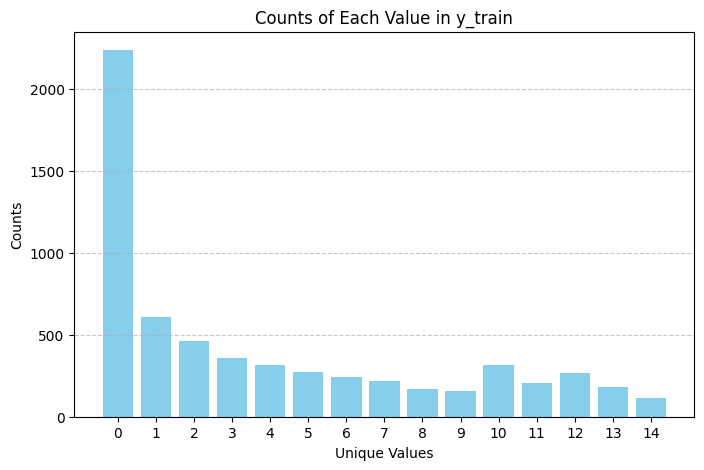

In [ ]:
#Displaying the count of each data point in our data set

values, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(8,5))
plt.bar(values, counts, color='skyblue')
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.title('Counts of Each Value in y_train')
plt.xticks(values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Grid Search


In [ ]:
#Initializing c array
#start = 0.00
#end = 1
#step = 0.01

#c_values = []

# Iterate over the range and append c values to the list
#c = start
#while c <= end:
    #c_values.append(c)
    #c += step

#print(c_values)

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import make_scorer, accuracy_score, f1_score
#Peforming Grid search

#param_grid = {
    #'C': c_values,
    #'penalty': ['l1','l2']}

#grid_search = GridSearchCV(OrdinalLogisticRegression(), param_grid, cv=5, scoring='f1_weighted', refit ='f1_weighted')

#grid_search.fit(X_train, y_train)

#best_f1_score  = grid_search.best_score_
#best_params = grid_search.best_params_
#print("Best Parameters:", best_params)

In [ ]:
#print(best_f1_score)

In [ ]:
#Initializing c array
#start = 1
#end = 10
#step = 0.1
#c_values = []
#c = start
#while c <= end:
    #c_values.append(c)
    #c += step

#print(c_values)

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import make_scorer, accuracy_score, f1_score

#TODO: Perform grid search using a proper criteria and identify the best parameter set
#Performing Grid Search

#param_grid = {
    #'C': c_values,
    #'penalty': ['l1', 'l2']}

#grid_search = GridSearchCV(OrdinalLogisticRegression(), param_grid, cv=5, scoring='f1_weighted', refit ='f1_weighted')
#grid_search.fit(X_train, y_train)
#best_f1_score  = grid_search.best_score_
#best_params = grid_search.best_params_
#print("Best Parameters:", best_params)

In [ ]:
#print(best_f1_score)

In [ ]:
#Fittign model with best parameters identified and getting feature importance
ordlog = OrdinalLogisticRegression(C = 5.7, penalty ='l1') #TODO: set the best-performing hyperparameters identified via grid searchordlog.fit(X_train, y_train)
ordlog.fit(X_train, y_train)
feature_importance_sorted  = ordlog.feature_importance()

## Visualize the feature importance of your model

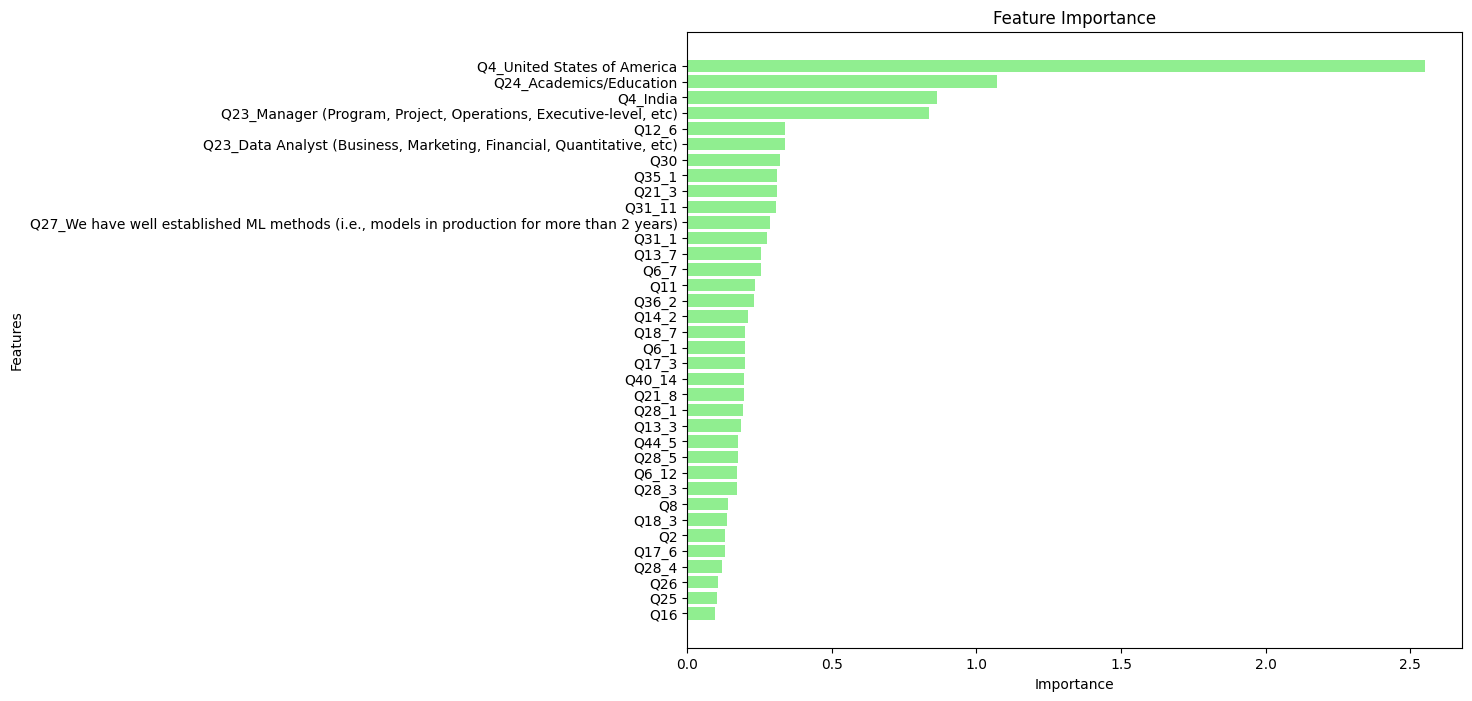

In [ ]:
#plotting feature importance fo rordinal logistic regression model

features = list(feature_importance_sorted.keys())
importances = list(feature_importance_sorted.values())
plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()


In [ ]:
from sklearn.metrics import classification_report

#Getting weighted f_1 score for our train data performance without using the best hyperparameters but rather the default values
ordlog_notuned = OrdinalLogisticRegression()
ordlog_notuned.fit(X_train, y_train)
ordlog_notuned.predict_proba(X_train)
y_pred_notuned = ordlog_notuned.predict(X_train)
notuned_report = classification_report(y_train, y_pred_notuned)
print(notuned_report)

              precision    recall  f1-score   support

         0.0       0.50      0.95      0.65      2237
         1.0       0.34      0.04      0.07       610
         2.0       0.27      0.03      0.05       465
         3.0       0.15      0.04      0.07       361
         4.0       0.21      0.13      0.16       317
         5.0       0.13      0.04      0.06       275
         6.0       0.14      0.02      0.04       245
         7.0       0.12      0.03      0.04       218
         8.0       0.17      0.01      0.02       168
         9.0       0.25      0.03      0.06       155
        10.0       0.19      0.32      0.24       314
        11.0       0.26      0.16      0.20       203
        12.0       0.32      0.52      0.39       268
        13.0       0.41      0.26      0.32       183
        14.0       0.36      0.07      0.12       112

    accuracy                           0.42      6131
   macro avg       0.25      0.18      0.17      6131
weighted avg       0.33   

In [ ]:
#Getting weighted+f1
ordlog_tuned = OrdinalLogisticRegression(C = 5.7, penalty ='l1')
ordlog_tuned.fit(X_train, y_train)
ordlog_tuned.predict_proba(X_train)
y_pred_tuned = ordlog_tuned.predict(X_train)
tuned_report = classification_report(y_train, y_pred_tuned)
print(tuned_report)

              precision    recall  f1-score   support

         0.0       0.51      0.94      0.66      2237
         1.0       0.37      0.05      0.08       610
         2.0       0.25      0.03      0.06       465
         3.0       0.18      0.06      0.08       361
         4.0       0.20      0.13      0.16       317
         5.0       0.15      0.05      0.07       275
         6.0       0.14      0.03      0.05       245
         7.0       0.13      0.05      0.07       218
         8.0       0.17      0.02      0.04       168
         9.0       0.23      0.05      0.08       155
        10.0       0.19      0.32      0.24       314
        11.0       0.25      0.17      0.20       203
        12.0       0.33      0.50      0.39       268
        13.0       0.37      0.27      0.31       183
        14.0       0.52      0.20      0.29       112

    accuracy                           0.42      6131
   macro avg       0.27      0.19      0.19      6131
weighted avg       0.34   

#  Testing

In [ ]:
#Testing and getting F_1 weighted on X_train and y_train data with best parameters
proba_train = ordlog.predict_proba(X_train)

y_pred_train = ordlog.predict(X_train)
report = classification_report(y_train, y_pred_train)
print(report)

              precision    recall  f1-score   support

         0.0       0.51      0.94      0.66      2237
         1.0       0.37      0.05      0.08       610
         2.0       0.25      0.03      0.06       465
         3.0       0.17      0.06      0.08       361
         4.0       0.20      0.13      0.16       317
         5.0       0.15      0.05      0.07       275
         6.0       0.14      0.03      0.05       245
         7.0       0.13      0.05      0.07       218
         8.0       0.17      0.02      0.04       168
         9.0       0.23      0.05      0.08       155
        10.0       0.19      0.32      0.24       314
        11.0       0.25      0.17      0.20       203
        12.0       0.33      0.50      0.40       268
        13.0       0.37      0.27      0.31       183
        14.0       0.52      0.20      0.29       112

    accuracy                           0.42      6131
   macro avg       0.27      0.19      0.19      6131
weighted avg       0.34   

In [ ]:
#Testing and getting F_1 weighted on X_test and y_test data with best parameters
proba_test = ordlog.predict_proba(X_test)
y_test_pred = ordlog.predict(X_test)

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.50      0.95      0.65       544
         1.0       0.12      0.02      0.03       132
         2.0       0.20      0.01      0.02       112
         3.0       0.10      0.04      0.05        79
         4.0       0.16      0.07      0.10        88
         5.0       0.12      0.03      0.04        75
         6.0       0.06      0.02      0.02        66
         7.0       0.00      0.00      0.00        63
         8.0       0.09      0.02      0.04        44
         9.0       0.09      0.03      0.04        38
        10.0       0.16      0.27      0.20        81
        11.0       0.17      0.14      0.15        63
        12.0       0.27      0.43      0.34        72
        13.0       0.22      0.13      0.16        47
        14.0       0.00      0.00      0.00        29

    accuracy                           0.39      1533
   macro avg       0.15      0.14      0.12      1533
weighted avg       0.26   

In [ ]:
#Getting a count of actual y values for each class in train y data and predicted y values for xtrain data
y_train_pred = ordlog.predict(X_train)
y_train_pred = np.array(y_train_pred)
unique_values_pred_train, counts_pred_train = np.unique(y_train_pred, return_counts=True)
for value, count in zip(unique_values_pred_train, counts_pred_train):
    print(f"Value: {value}, Count: {count}")

unique_values_act_train, counts_pred_act_train = np.unique(y_train, return_counts=True)
for value, count in zip(unique_values_act_train, counts_pred_act_train):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 4151
Value: 1, Count: 76
Value: 2, Count: 60
Value: 3, Count: 115
Value: 4, Count: 200
Value: 5, Count: 87
Value: 6, Count: 51
Value: 7, Count: 76
Value: 8, Count: 23
Value: 9, Count: 31
Value: 10, Count: 536
Value: 11, Count: 140
Value: 12, Count: 410
Value: 13, Count: 133
Value: 14, Count: 42
Value: 0.0, Count: 2237
Value: 1.0, Count: 610
Value: 2.0, Count: 465
Value: 3.0, Count: 361
Value: 4.0, Count: 317
Value: 5.0, Count: 275
Value: 6.0, Count: 245
Value: 7.0, Count: 218
Value: 8.0, Count: 168
Value: 9.0, Count: 155
Value: 10.0, Count: 314
Value: 11.0, Count: 203
Value: 12.0, Count: 268
Value: 13.0, Count: 183
Value: 14.0, Count: 112


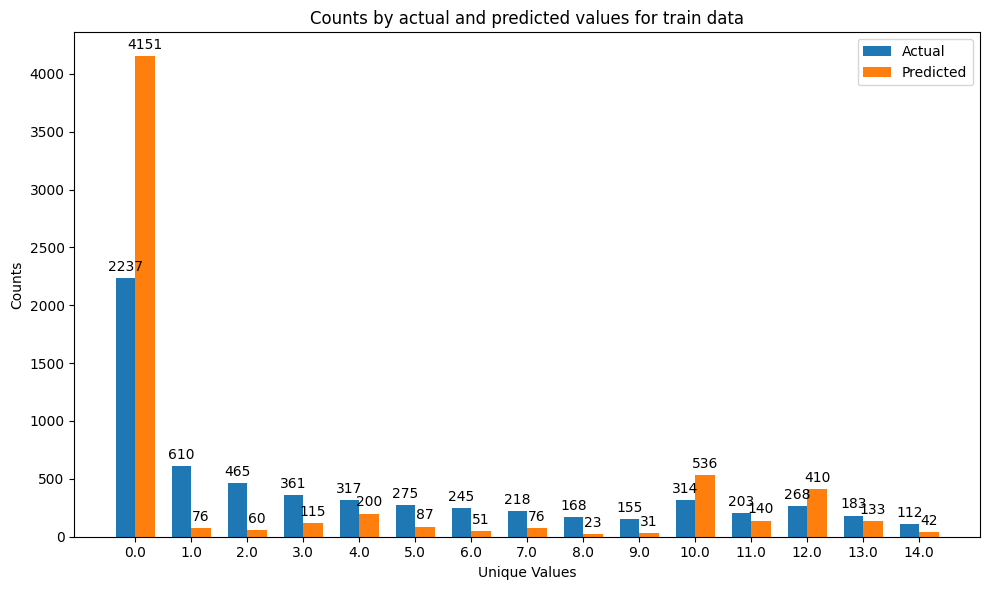

In [ ]:
#plotting this information
unique_values_act_train, counts_act_train = np.unique(y_train, return_counts=True)
unique_values_pred_train, counts_pred_train = np.unique(y_train_pred, return_counts=True)

all_unique_values = np.unique(np.concatenate((unique_values_act_train, unique_values_pred_train)))
counts_act_train_aligned = np.zeros_like(all_unique_values, dtype=int)
counts_pred_train_aligned = np.zeros_like(all_unique_values, dtype=int)

for i, value in enumerate(all_unique_values):
    if value in unique_values_act_train:
        counts_act_train_aligned[i] = counts_act_train[np.where(unique_values_act_train == value)]
    if value in unique_values_pred_train:
        counts_pred_train_aligned[i] = counts_pred_train[np.where(unique_values_pred_train == value)]

x = np.arange(len(all_unique_values))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, counts_act_train_aligned, width, label='Actual')
rects2 = ax.bar(x + width/2, counts_pred_train_aligned, width, label='Predicted')

ax.set_xlabel('Unique Values')
ax.set_ylabel('Counts')
ax.set_title('Counts by actual and predicted values for train data')
ax.set_xticks(x)
ax.set_xticklabels(all_unique_values)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


In [ ]:
#Getting a count of actual y values for each class in test y data and predicted y values for xtest data
y_test_pred = ordlog.predict(X_test)
y_test_pred = np.array(y_test_pred)
unique_values_pred_test, counts_pred_test = np.unique(y_test_pred, return_counts=True)
for value, count in zip(unique_values_pred_test, counts_pred_test):
    print(f"Value: {value}, Count: {count}")

unique_values_act_test, counts_act_test = np.unique(y_test, return_counts=True)
for value, count in zip(unique_values_act_test, counts_act_test):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 1029
Value: 1, Count: 17
Value: 2, Count: 5
Value: 3, Count: 31
Value: 4, Count: 37
Value: 5, Count: 16
Value: 6, Count: 18
Value: 7, Count: 14
Value: 8, Count: 11
Value: 9, Count: 11
Value: 10, Count: 140
Value: 11, Count: 54
Value: 12, Count: 113
Value: 13, Count: 27
Value: 14, Count: 10
Value: 0.0, Count: 544
Value: 1.0, Count: 132
Value: 2.0, Count: 112
Value: 3.0, Count: 79
Value: 4.0, Count: 88
Value: 5.0, Count: 75
Value: 6.0, Count: 66
Value: 7.0, Count: 63
Value: 8.0, Count: 44
Value: 9.0, Count: 38
Value: 10.0, Count: 81
Value: 11.0, Count: 63
Value: 12.0, Count: 72
Value: 13.0, Count: 47
Value: 14.0, Count: 29


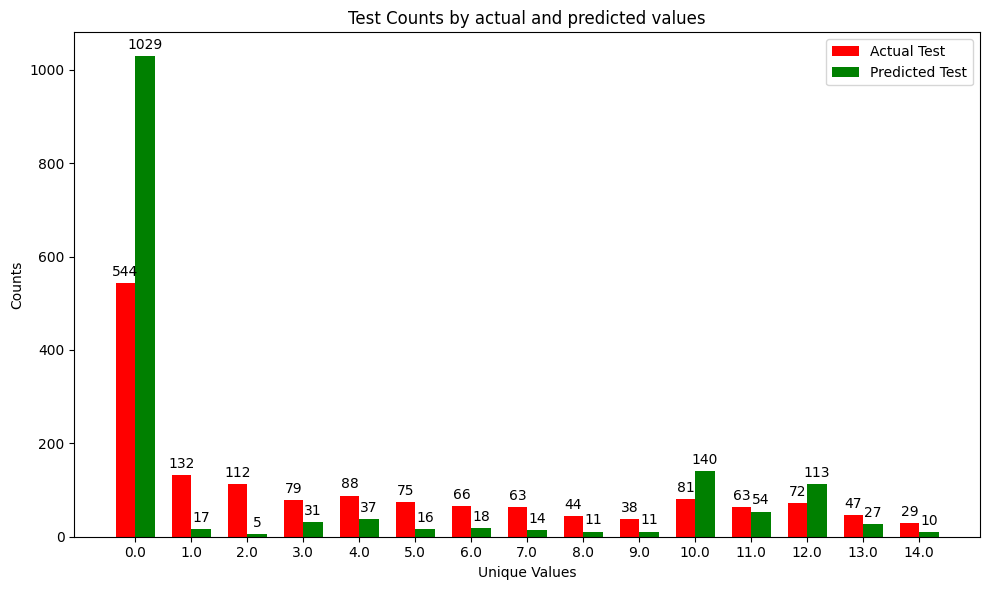

In [ ]:
#Plotting this information
unique_values_act_test, counts_act_test = np.unique(y_test, return_counts=True)
unique_values_pred_test, counts_pred_test = np.unique(y_test_pred, return_counts=True)

all_unique_values_test = np.unique(np.concatenate((unique_values_act_test, unique_values_pred_test)))
counts_act_test_aligned = np.zeros_like(all_unique_values_test, dtype=int)
counts_pred_test_aligned = np.zeros_like(all_unique_values_test, dtype=int)

for i, value in enumerate(all_unique_values_test):
    if value in unique_values_act_test:
        counts_act_test_aligned[i] = counts_act_test[np.where(unique_values_act_test == value)]
    if value in unique_values_pred_test:
        counts_pred_test_aligned[i] = counts_pred_test[np.where(unique_values_pred_test == value)]

x_test = np.arange(len(all_unique_values_test))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1_test = ax.bar(x_test - width/2, counts_act_test_aligned, width, label='Actual Test',color = 'red')
rects2_test = ax.bar(x_test + width/2, counts_pred_test_aligned, width, label='Predicted Test', color = 'green')

ax.set_xlabel('Unique Values')
ax.set_ylabel('Counts')
ax.set_title('Test Counts by actual and predicted values')
ax.set_xticks(x_test)
ax.set_xticklabels(all_unique_values_test)
ax.legend()

ax.bar_label(rects1_test, padding=3)
ax.bar_label(rects2_test, padding=3)

fig.tight_layout()

plt.show()